### Connector
- 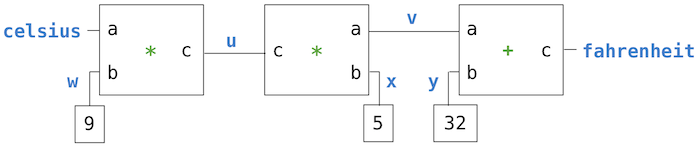
- The connectors celsius, farenheit, u, v, w, x, and y are a link between a value and constraint
- In the function below the connector also encapsulates connector beahvior by responding to messages
- Response to messages notifies constraints of change and affects the value contained by the connectors

In [2]:
def connector(name=None):
    """A connector between constraints."""
    informant = None
    constraints = []
    def set_value(source, value):
        nonlocal informant
        val = connector['val']
        if val is None:
            informant, connector['val'] = source, value
            if name is not None:
                print(name, '=', value)
            inform_all_except(source, 'new_val', constraints)
        else:
            if val != value:
                print('Contradiction detected:', val, 'vs', value)
    def forget_value(source):
        nonlocal informant
        if informant == source:
            informant, connector['val'] = None, None
            if name is not None:
                print(name, 'is forgotten')
            inform_all_except(source, 'forget', constraints)
    connector = {'val': None,
                 'set_val': set_value,
                 'forget': forget_value,
                 'has_val': lambda: connector['val'] is not None,
                 'connect': lambda source: constraints.append(source)}
    return connector

In [3]:
celsius = connector('Celsius')

#### Calling the connector function returns a dictionary 
- 'val':       a value that has a default of None
- 'set_value': a set_value function of the connector frame that takes a source and a value
- 'forget':    a forget_value function of the connector frame that takes a source
- 'has_val':   a lambda function that returns a boolean
- 'connect':   a lambda function that takes a source and appends it to the constraints list

In [4]:
celsius

{'val': None,
 'set_val': <function __main__.connector.<locals>.set_value(source, value)>,
 'forget': <function __main__.connector.<locals>.forget_value(source)>,
 'has_val': <function __main__.connector.<locals>.<lambda>()>,
 'connect': <function __main__.connector.<locals>.<lambda>(source)>}

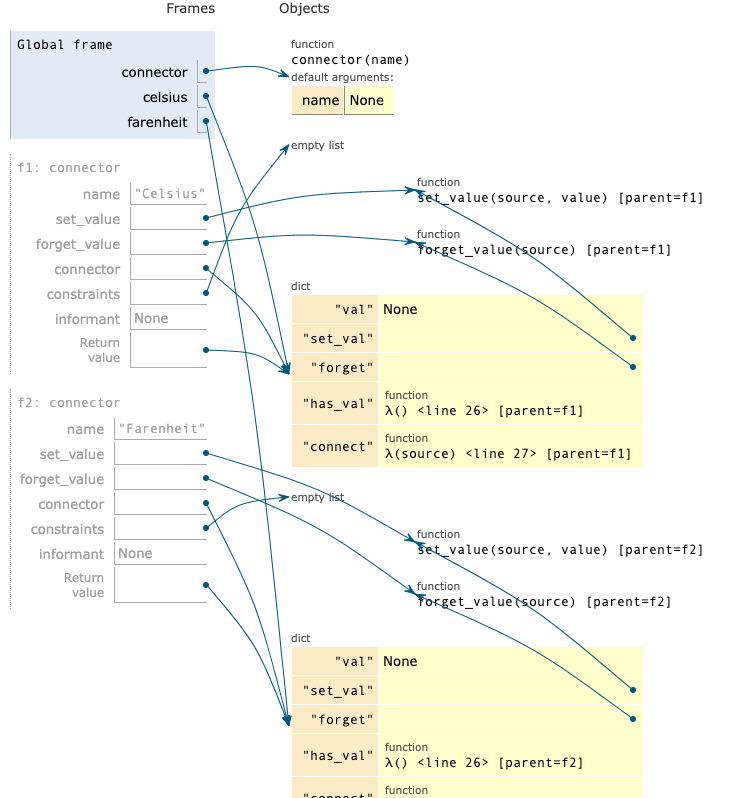 -from pythontutor.com

In [5]:
farenheit = connector('Farenheit')

In [6]:
farenheit

{'val': None,
 'set_val': <function __main__.connector.<locals>.set_value(source, value)>,
 'forget': <function __main__.connector.<locals>.forget_value(source)>,
 'has_val': <function __main__.connector.<locals>.<lambda>()>,
 'connect': <function __main__.connector.<locals>.<lambda>(source)>}

#### The connector function returns the same dictionary but within a new frame
- The farenheit and celsius connectors have the same dictionary but each within its own frame
- They are not able to interact with one another until a conversion function creates a network of constraints and connectors
- The conversion function will also call the connector function for the remaining connectors u, v, w, x, and y

Next - The conversion function